In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')
data = data[0:10000]
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [ ]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


<Axes: >

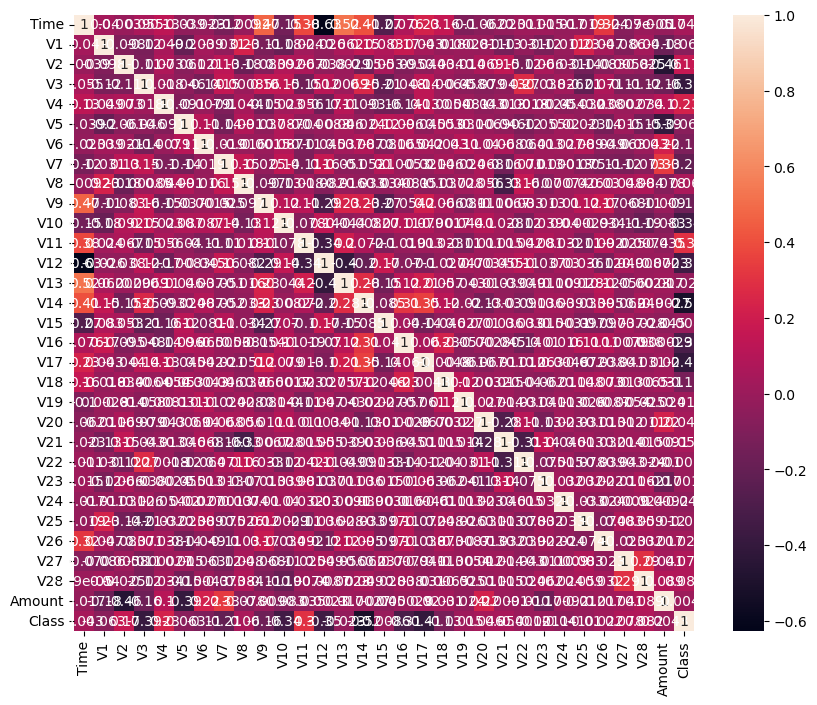

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [ ]:
np.shape(data)

(10000, 31)

<Axes: xlabel='Class', ylabel='count'>

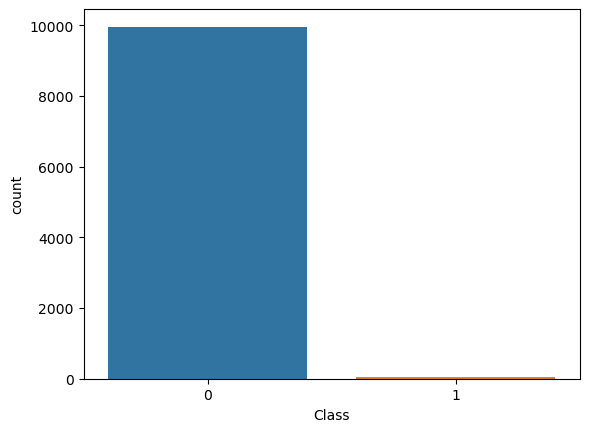

In [ ]:
sns.countplot(x=data.Class)

In [ ]:
data['Amount'].value_counts()

1.00       620
15.95      351
14.95      145
0.89       145
39.00      141
          ... 
110.75       1
779.72       1
1480.00      1
95.93        1
159.28       1
Name: Amount, Length: 3782, dtype: int64

# FEature Selection

In [ ]:
Y = data['Class']
X = data.drop('Class',1)

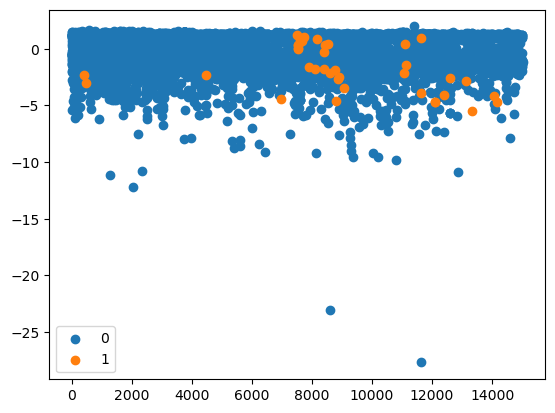

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter_y = Counter(Y)

for label, _ in counter_y.items():
	row_ix = np.where(Y == label)[0]
	pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Lasso Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
model = Lasso()

rfe = RFE(model, step=12)
rfe = rfe.fit(X, Y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13', 'V28', 'Amount']


In [ ]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13', 'V28', 'Amount']


In [ ]:
Selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13', 'V28', 'Amount']
X = data[Selected_features]

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V13,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,0.489095,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,0.507757,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,1.345852,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001.0,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,0.473040,0.331248,-0.406853,-3.076411,1.421080,0.008709,53.19
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,1.699304,-0.531014,0.950229,-2.357223,1.395353,0.012277,12.18
9997,15008.0,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,1.599496,-1.586419,0.107872,-2.325503,1.170943,0.031272,4.05
9998,15010.0,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.946896,-1.373455,0.433736,-2.364680,1.342560,0.007846,4.05


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: int64

In [ ]:
#data_processed = X
#data_processed['Class'] = Y
#data_processed.to_csv('processed.csv')

In [ ]:
#data_processed['Class'].value_counts()

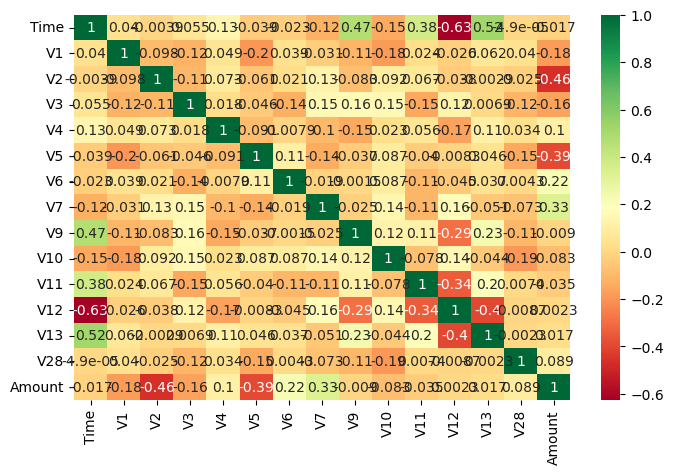

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
# Check for missing data
data.dropna(inplace = True)

<Axes: xlabel='Class', ylabel='count'>

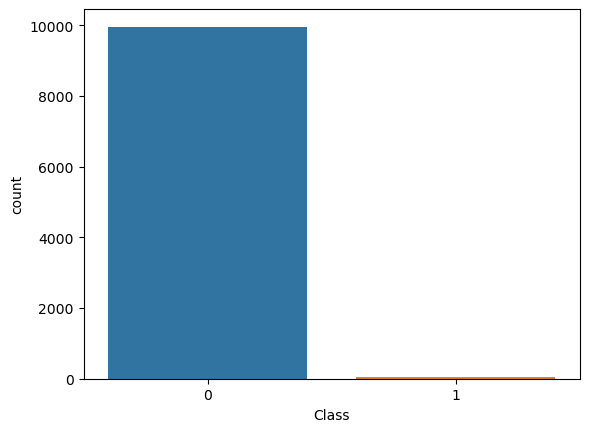

In [ ]:
sns.countplot(x=data['Class'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V13,V28,Amount
651,492.0,-0.789890,-1.379371,0.171334,-1.636756,-2.807266,0.726236,2.737602,-2.413730,0.796625,-0.878071,-1.045044,1.249929,-0.408050,632.40
6560,7949.0,-0.944392,1.120606,1.943698,0.438131,0.357940,-0.524502,0.527956,0.785934,-0.185841,2.479401,-2.509679,0.880309,-0.062716,3.59
8974,12399.0,1.168740,-0.180544,0.741365,0.283013,-0.611288,-0.057707,-0.511689,1.881734,-0.588152,2.244231,-1.510448,0.831268,-0.019860,3.30
2348,1892.0,-2.183004,-0.401099,0.864277,1.256849,0.797138,-1.377806,0.372290,0.095818,0.619713,-0.601356,-0.664150,-0.952913,0.568065,21.50
5670,5930.0,-1.788635,-1.712669,0.986718,-1.975763,2.219729,-1.987765,-0.805166,1.989917,-1.649627,1.484004,-1.674431,1.538475,0.167245,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2440.0,-1.312804,1.669903,0.912969,0.889439,-0.286737,-0.763205,0.531421,-0.481063,0.326102,-0.048958,0.750987,1.187114,-0.052964,38.19
7813,10879.0,-0.418463,0.619981,2.263142,-0.105900,-0.185224,-0.360789,0.595857,0.968862,-0.787718,1.292230,-2.351918,2.053873,-0.126262,46.04
905,681.0,1.120872,0.142425,0.782354,1.517495,-0.451665,-0.179163,-0.099553,0.422085,-0.177543,-0.268722,0.916821,0.287166,0.023309,9.99
5192,4956.0,1.300774,0.165218,-1.158493,-0.273887,2.206840,3.231120,-0.588503,1.210062,-0.591265,1.079232,-2.534780,1.652524,0.018446,8.99


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for SVM:  99.72 

*Confusion Matrix for SVM: 
[[2493    0]
 [   7    0]]


In [ ]:
from sklearn.metrics import precision_recall_curve,roc_auc_score,precision_score,recall_score,f1_score

prec_svm = precision_score(y_test, predictions)
rec_svm = recall_score(y_test, predictions)
f1_svm = f1_score(y_test, predictions)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for RF:  99.88 

*Confusion Matrix for RF: 
[[2493    0]
 [   3    4]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_rf = (precision[1] + recall[1] + thresholds[1]) / 3
auc_rf = roc_auc_score(y_test, predictions)
prec_rf = precision_score(y_test, predictions)
rec_rf = recall_score(y_test, predictions)
f1_rf = f1_score(y_test, predictions)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for KNN:  99.68 

*Confusion Matrix for KNN: 
[[2492    1]
 [   7    0]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_knn = (precision[1] + recall[1] + thresholds[1]) / 3
auc_knn = roc_auc_score(y_test, predictions)
prec_knn = precision_score(y_test, predictions)
rec_knn = recall_score(y_test, predictions)
f1_knn = f1_score(y_test, predictions)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val4, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for DT:  99.76 

*Confusion Matrix for DT: 
[[2488    5]
 [   1    6]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_dt = (precision[1] + recall[1] + thresholds[1]) / 3
auc_dt = roc_auc_score(y_test, predictions)
prec_dt = precision_score(y_test, predictions)
rec_dt = recall_score(y_test, predictions)
f1_dt = f1_score(y_test, predictions)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val5, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for LR:  99.92 

*Confusion Matrix for LR: 
[[2493    0]
 [   2    5]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_lr = (precision[1] + recall[1] + thresholds[1]) / 3
auc_lr = roc_auc_score(y_test, predictions)
prec_lr = precision_score(y_test, predictions)
rec_lr = recall_score(y_test, predictions)
f1_lr = f1_score(y_test, predictions)

# Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(n_estimators=5, random_state=1)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[2493    0]
 [   3    4]]


In [ ]:
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting: ", val6, "\n")

*Accuracy score for Voting:  99.88 



In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_vot = (precision[1] + recall[1] + thresholds[1]) / 3
auc_vot = roc_auc_score(y_test, predictions)
prec_vot = precision_score(y_test, predictions)
rec_vot = recall_score(y_test, predictions)
f1_vot = f1_score(y_test, predictions)

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(SVC(),n_estimators=10, random_state=0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for XGB: ", val7, "\n")

*Accuracy score for XGB:  99.72 



In [ ]:

prec_bag = precision_score(y_test, predictions)
rec_bag = recall_score(y_test, predictions)
f1_bag = f1_score(y_test, predictions)

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MLP: ", val8, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for MLP:  99.8 

*Confusion Matrix for MLP: 
[[2491    2]
 [   3    4]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
prc_mlp = (precision[1] + recall[1] + thresholds[1]) / 3
auc_mlp = roc_auc_score(y_test, predictions)
prec_mlp = precision_score(y_test, predictions)
rec_mlp = recall_score(y_test, predictions)
f1_mlp = f1_score(y_test, predictions)

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_test)
val9 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LDA: ", val9, "\n")
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for LDA:  99.88 

*Confusion Matrix for LDA: 
[[2493    0]
 [   3    4]]


In [ ]:
prec_lda = precision_score(y_test, predictions)
rec_lda = recall_score(y_test, predictions)
f1_lda = f1_score(y_test, predictions)

# Stacking Classifier 

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', SVC(random_state=42))]
AD = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
AD.fit(X_train, y_train)
predictions = AD.predict(X_test)
val10 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Stack: ", val10, "\n")
print("*Confusion Matrix for Stack: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for Stack:  99.83999999999999 

*Confusion Matrix for Stack: 
[[2493    0]
 [   4    3]]


In [ ]:
prec_stac = precision_score(y_test, predictions)
rec_stac = recall_score(y_test, predictions)
f1_stac = f1_score(y_test, predictions)

# QSVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import assemble, Aer, transpile, execute
from qiskit import BasicAer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import ParameterVector
from qiskit.visualization import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import QSVC,QSVR
from qiskit.algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.kernels import QuantumKernel

import sklearn
from sklearn import metrics

import pandas as pd

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
def getDataWithStatsFeatures(xDropped):
    
    data = pd.DataFrame()
    data['CONS_NO'] = xDropped['Time']
    data['FLAG'] = xDropped['Amount']
    data['Mean'] = xDropped.iloc[:,2:].mean(axis=1, skipna=True, numeric_only=True)
    data['Median'] = xDropped.iloc[:,2:].median(axis=1, skipna=True, numeric_only=True )
    data['Standard deviation'] = xDropped.iloc[:,2:].std(axis=1, skipna=True, numeric_only=True)
    data['Variance'] = xDropped.iloc[:,2:].var(axis=1, skipna=True, numeric_only=True )
    data['Kurtosis'] = xDropped.iloc[:,2:].kurtosis(axis=1, skipna=True, numeric_only=True)
    data['Skew'] = xDropped.iloc[:,2:].skew(axis=1, skipna=True, numeric_only=True )
    data['5%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.05)
    data['10%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.1)
    data['20%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.2)
    data['25%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.25)
    data['30%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.3)
    data['40%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.4)
    data['60%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.6)
    data['75%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.75)
    data['80%'] = xDropped.iloc[:,2:].quantile(axis=1, numeric_only=True, q = 0.8)
    
    data['Error in mean'] = data['Standard deviation']/len(xDropped.columns)
    
    return data

In [ ]:
def getFeaturesLabels(data):
    
    features = np.zeros((len(data), 6))
    features[:,0] = np.array(data['Median'])
    features[:,1] = np.array(data['Standard deviation'])
    features[:,2] = np.array(data['Variance'])
    features[:,3] = np.array(data['Skew'])
    features[:,4] = np.array(data['Kurtosis'])
    features[:,5] = np.array(data['75%'])

    labels = np.array(data['FLAG'])
    
    return features, labels

In [ ]:
class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

In [ ]:
def getTrainTestData(features, labels, splitPercentage1 = 0.9, splitPercentage2 = 0.7, inclLabel1inXtrain = True):
    
    if inclLabel1inXtrain == True:
            
            np.random.seed(555555)
            Xtrain = features[labels==1]
            ind1 = np.random.choice(np.arange(0, len(features[labels==1])), int(len(features[labels==1])*splitPercentage2), replace=False)
            ind = np.random.choice(np.arange(len(features[labels==1]), len(features)), int(len(features)*splitPercentage1-len(labels[labels==1])*splitPercentage2), replace=False)
            Xtrain = Xtrain[ind1]
            xt = features[ind]
            Xtrain = np.concatenate((Xtrain, xt))
            Ytrain = np.concatenate((labels[labels==1][ind1], labels[ind]))
            temp = np.arange(Xtrain.shape[0])
            np.random.shuffle(temp)
            Xtrain, Ytrain = Xtrain[temp], Ytrain[temp]
            Xtest1 = np.delete(features, ind, axis=0)[len(labels[labels==1]):]
            Ytest1 = np.zeros((len(Xtest1)), int)
            Xtest2 = np.delete(features[:len(labels[labels==1])], ind1, axis=0)
            Ytest2 = np.ones((len(Xtest2)), int)
            Xtest = np.concatenate((Xtest1, Xtest2))
            Ytest = np.concatenate((Ytest1, Ytest2))
   
    else:

        Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(features, labels,
                                                                   train_size = splitPercentage, random_state=45)
    
    return Xtrain, Ytrain, Xtest, Ytest

In [ ]:
def getOptimizedKernel(quantumKernel, Xtrain, Ytrain):
    
    cb_qkt = QKTCallback()
    spsaOpt = SPSA(maxiter=15, callback=cb_qkt.callback, learning_rate=0.1, perturbation=0.2)

    qkt = QuantumKernelTrainer(quantum_kernel=quantumKernel, loss="svc_loss", optimizer=spsaOpt,
                           initial_point=[0.1])
    print('parameter training started...')
    qkaResults = qkt.fit(Xtrain, Ytrain)
    print('parameter training done...')
    optimizedKernel = qkaResults.quantum_kernel
    plot_data = cb_qkt.get_callback_data()

    return optimizedKernel, qkaResults, plot_data

In [ ]:
def getQuantumKernel(Xtrain, Ytrain, featureDim, custom):

    backend = QuantumInstance(BasicAer.get_backend("statevector_simulator"))

    qc = QuantumCircuit(3)
    params = ParameterVector("θ", 1)
    param_data = ParameterVector("x", 6)
    qc.h([0,1,2])
    qc.ry(params[0], [0,1,2])
    qc.cz(0,1)
    qc.rx(-2*param_data[1], 1)
    qc.rz(-2*param_data[3], 1)
    qc.cz(0,1)
    qc.barrier()
    qc.cz(1,2)
    qc.rx(-2*param_data[2], 2)
    qc.rz(-2*param_data[4], 2)
    qc.cz(1,2)
    qc.barrier()
    qc.cz(2,0)
    qc.rx(-2*param_data[0], 0)
    qc.rz(-2*param_data[5], 0)
    qc.cz(2,0)
    qc.barrier()
    qc.rz(params[0], [0,1,2])

    fM = ZZFeatureMap(feature_dimension = featureDim, reps = 1, data_map_func=None)
    
    
    if custom == True:
        featureMap = qc
        quantumKernel = QuantumKernel(feature_map = featureMap, user_parameters=params, quantum_instance = backend)
        optimizedKernel, qkaResults, plot_data = getOptimizedKernel(quantumKernel, Xtrain, Ytrain)
        
        return optimizedKernel, plot_data, qkaResults
    
    else:
        
        featureMap = fM
        quantumKernel = QuantumKernel(feature_map = featureMap, quantum_instance = backend)
    
        return quantumKernel

In [ ]:
x = pd.read_csv("processed.csv")

In [ ]:
x.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V13,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,0.489095,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,0.507757,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,1.345852,0.215153,69.99,0


In [ ]:
del x['Unnamed: 0']

In [ ]:
data = getDataWithStatsFeatures(x)
features, labels = getFeaturesLabels(data)

NameError: name 'getDataWithStatsFeatures' is not defined

In [ ]:
#splitPercentage1: percentage of training dataset
#splitPercentage2: percentage of label 1 in training dataset
Xtrain, Ytrain, Xtest, Ytest = getTrainTestData(features, labels, splitPercentage1=0.1, splitPercentage2=0.5, inclLabel1inXtrain=True)

NameError: name 'features' is not defined

In [ ]:
qk = getQuantumKernel(Xtrain, Ytrain, featureDim = len(features[0]), custom=False)

NameError: name 'Xtrain' is not defined

In [ ]:
qsvc = QSVR(quantum_kernel=qk)
qsvc.fit(Xtrain, Ytrain)

NameError: name 'QSVR' is not defined

In [ ]:
labelsTest = qsvc.predict(Xtest)

NameError: name 'qsvc' is not defined

In [ ]:
print(metrics.r2_score(y_true=Ytest, y_pred=labelsTest))

-1730.211797013712


# Comparison

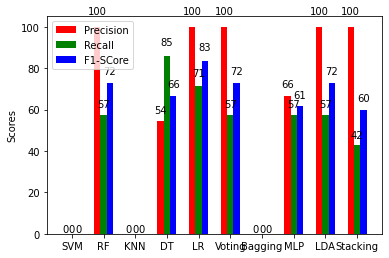

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [prec_svm*100,prec_rf*100,prec_knn*100,prec_dt*100,prec_lr*100,prec_vot*100,prec_bag*100,prec_mlp*100,prec_lda*100,prec_stac*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [rec_svm*100,rec_rf*100,rec_knn*100,rec_dt*100,rec_lr*100,rec_vot*100,rec_bag*100,rec_mlp*100,rec_lda*100,rec_stac*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [f1_svm*100,f1_rf*100,f1_knn*100,f1_dt*100,f1_lr*100,f1_vot*100,f1_bag*100,f1_mlp*100,f1_lda*100,f1_stac*100]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('SVM','RF','KNN','DT','LR','Voting','Bagging','MLP','LDA','Stacking') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Precision', 'Recall', 'F1-SCore') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Accuracy Comparison

In [ ]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val9,val10]

In [ ]:
#make variabel for save the result and to show it
classifier = ('SVM','RF','KNN','DT','LR','Voting','Bagging','MLP','LDA','Stacking')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8 9]
[99.72, 99.88, 99.68, 99.76, 99.92, 99.88, 99.72, 99.8, 99.88, 99.83999999999999]


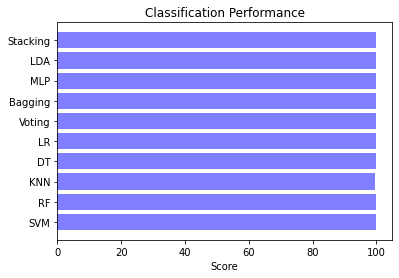

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

In [ ]:
filename = 'model_stac.sav'
joblib.dump(AD, filename)

['model_stac.sav']